In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 8
fig_height = 5
fig_format = 'png'
fig_dpi = 200
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/development/projects/active/HIRT/docs/field-guide':
  os.chdir(r'/development/projects/active/HIRT/docs/field-guide')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/usr/lib/python3.12/importlib/_bootstrap.py": 1767871850.0, "/usr/lib/python3.12/importlib/_bootstrap_external.py": 1767871850.0, "/usr/lib/python3.12/zipimport.py": 1767871850.0, "/usr/lib/python3.12/codecs.py": 1767871850.0, "/usr/lib/python3.12/encodings/aliases.py": 1767871850.0, "/usr/lib/python3.12/encodings/__init__.py": 1767871850.0, "/usr/lib/python3.12/encodings/utf_8.py": 1767871850.0, "/usr/lib/python3.12/abc.py": 1767871850.0, "/usr/lib/python3.12/io.py": 1767871850.0, "/usr/lib/python3.12/stat.py": 1767871850.0, "/usr/lib/python3.12/_collections_abc.py": 1767871850.0, "/usr/lib/python3.12/genericpath.py": 1767871850.0, "/usr/lib/python3.12/posixpath.py": 1767871850.0, "/usr/lib/python3.12/os.py": 1767871850.0, "/usr/lib/python3.12/_sitebuiltins.py": 1767871850.0, "/usr/lib/python3/dist-packages/_distutils_hack/__init__.py": 1692360458.0, "/usr/lib/python3/dist-packages/apport_python_hook.py": 1713443495.0, "/usr/lib/python3.12/sitecustomize.py": 1712727227.0, "/usr/lib/

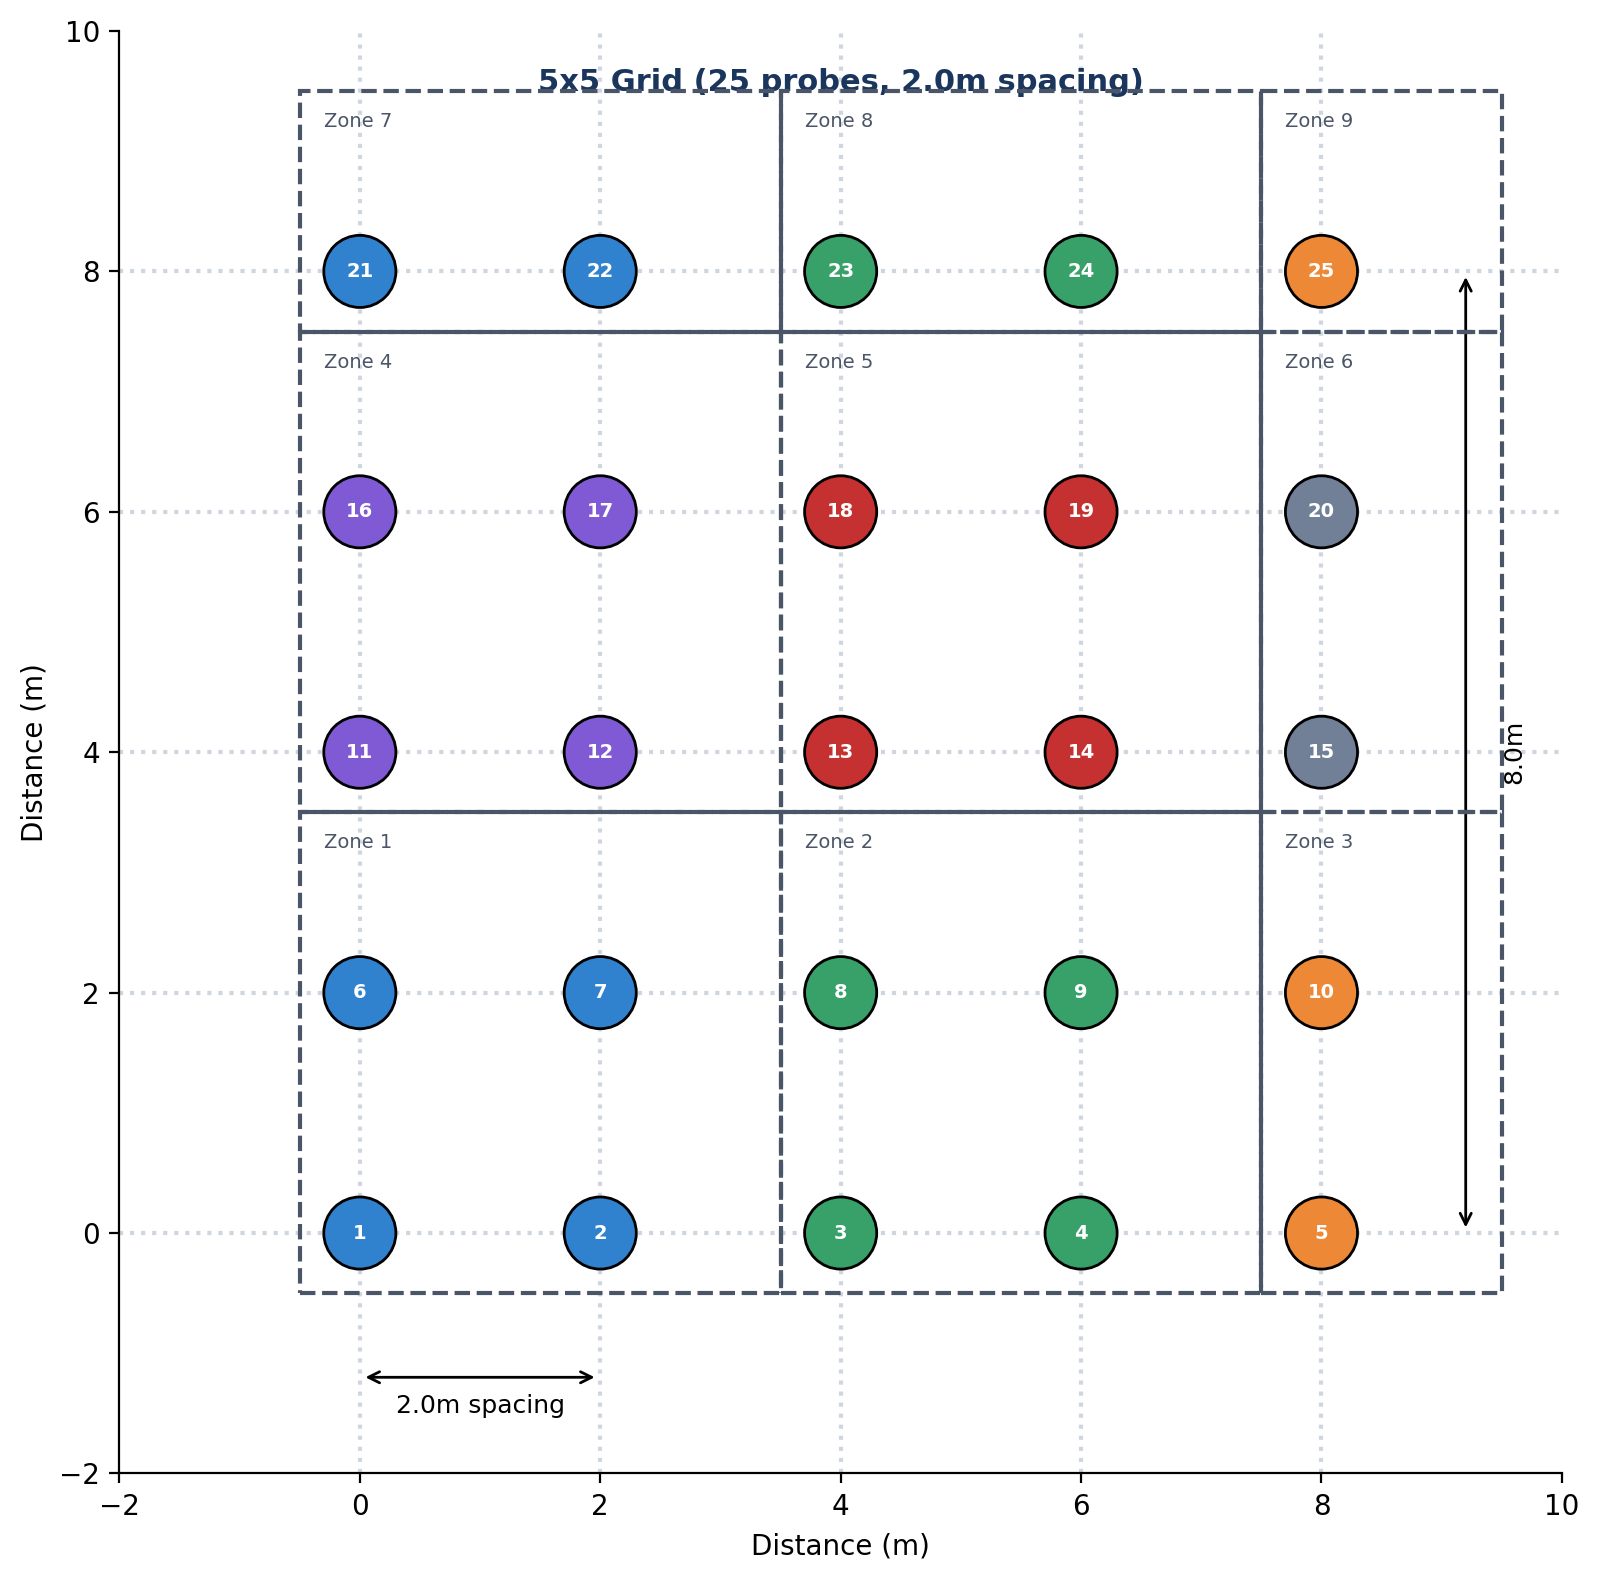

In [2]:
#| label: fig-grid-layout
#| fig-cap: Standard 10x10 m grid layout with 2 m probe spacing showing zone groupings for sequential deployment. Probes are numbered 1-25 in row-major order.

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import numpy as np

# Color palette
COLORS = {
    'primary': '#1a365d',
    'secondary': '#2c5282',
    'accent': '#3182ce',
    'success': '#38a169',
    'warning': '#c53030',
    'orange': '#ed8936',
    'purple': '#805ad5',
    'gray_dark': '#4a5568',
    'gray_med': '#718096',
    'gray_light': '#a0aec0',
}

rows, cols, spacing = 5, 5, 2.0

fig, ax = plt.subplots(figsize=(10, 8))

total_width = (cols - 1) * spacing
total_height = (rows - 1) * spacing

ax.set_xlim(-2, total_width + 2)
ax.set_ylim(-2, total_height + 2)
ax.set_aspect('equal')

# Draw probe positions
probe_num = 1
for i in range(rows):
    for j in range(cols):
        x = j * spacing
        y = i * spacing

        # Zone coloring
        zone = (i // 2) * ((cols + 1) // 2) + (j // 2)
        zone_colors = [COLORS['accent'], COLORS['success'],
                      COLORS['orange'], COLORS['purple'],
                      COLORS['warning'], COLORS['gray_med']]
        color = zone_colors[zone % len(zone_colors)]

        # Probe marker
        ax.add_patch(Circle((x, y), 0.3, facecolor=color,
                           edgecolor='black', lw=1, zorder=10))
        ax.text(x, y, str(probe_num), ha='center', va='center',
               fontsize=7, color='white', fontweight='bold', zorder=11)
        probe_num += 1

# Grid lines
for i in range(rows):
    ax.axhline(i * spacing, color=COLORS['gray_light'], linestyle=':', alpha=0.5)
for j in range(cols):
    ax.axvline(j * spacing, color=COLORS['gray_light'], linestyle=':', alpha=0.5)

# Zone boxes
zone_num = 1
for zi in range(0, rows, 2):
    for zj in range(0, cols, 2):
        x0 = zj * spacing - 0.5
        y0 = zi * spacing - 0.5
        w = min(2, cols - zj) * spacing
        h = min(2, rows - zi) * spacing
        ax.add_patch(Rectangle((x0, y0), w, h,
                               facecolor='none', edgecolor=COLORS['gray_dark'],
                               linestyle='--', lw=1.5, zorder=5))
        ax.text(x0 + 0.2, y0 + h - 0.3, f'Zone {zone_num}',
               fontsize=7, color=COLORS['gray_dark'])
        zone_num += 1

# Dimension annotations
ax.annotate('', xy=(spacing, -1.2), xytext=(0, -1.2),
           arrowprops=dict(arrowstyle='<->', color='black', lw=1))
ax.text(spacing/2, -1.5, f'{spacing}m spacing', ha='center', fontsize=9)

ax.annotate('', xy=(total_width + 1.2, total_height), xytext=(total_width + 1.2, 0),
           arrowprops=dict(arrowstyle='<->', color='black', lw=1))
ax.text(total_width + 1.5, total_height/2, f'{total_height}m', va='center',
       fontsize=9, rotation=90)

# Legend
ax.text(total_width/2, total_height + 1.5,
       f'{rows}x{cols} Grid ({rows*cols} probes, {spacing}m spacing)',
       ha='center', fontsize=11, fontweight='bold', color=COLORS['primary'])

ax.set_xlabel('Distance (m)', fontsize=10)
ax.set_ylabel('Distance (m)', fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

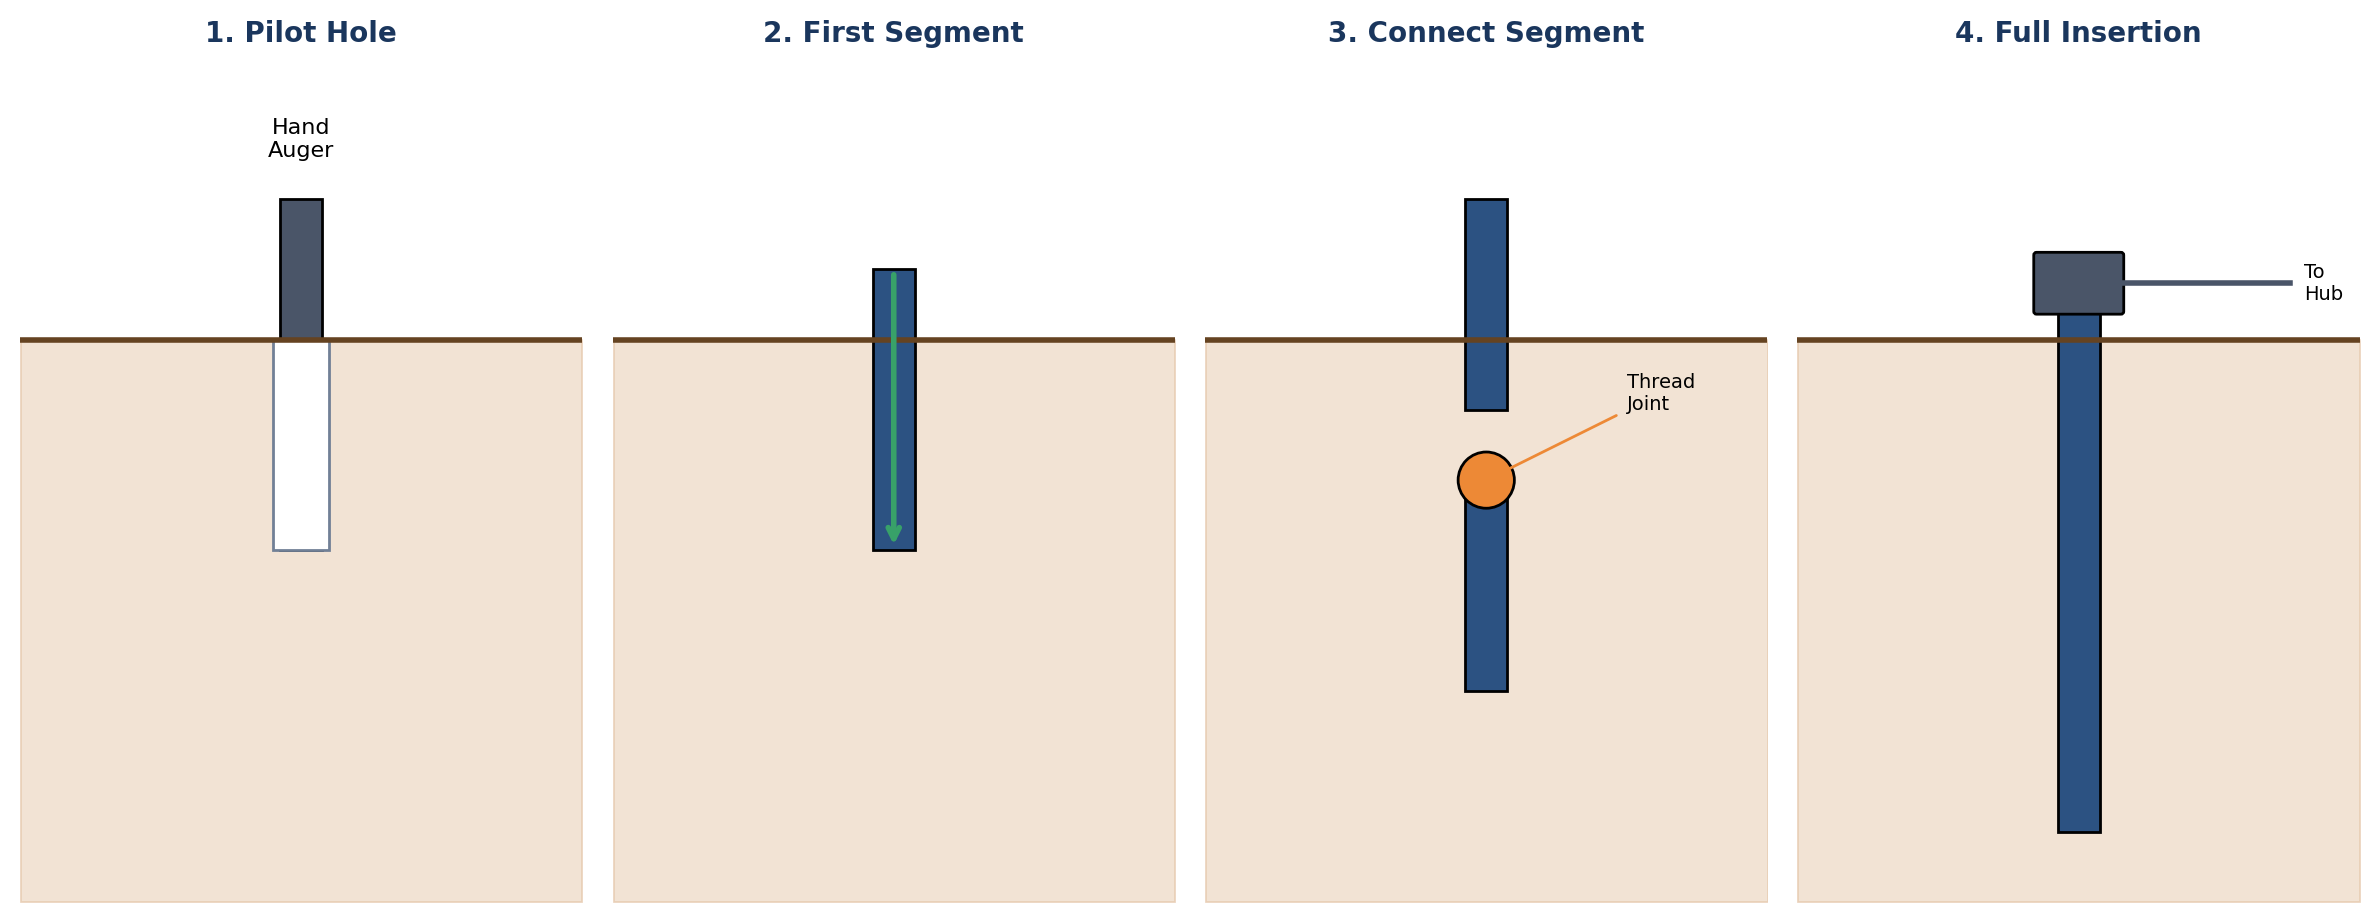

In [3]:
#| label: fig-insertion-procedure
#| fig-cap: 'Probe insertion procedure showing the four-step process: (1) pilot hole creation with hand auger, (2) first segment insertion, (3) segment connection at thread joint, and (4) completed installation with junction box and cable routing.'

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Circle, Rectangle

COLORS = {
    'primary': '#1a365d',
    'secondary': '#2c5282',
    'success': '#38a169',
    'orange': '#ed8936',
    'gray_dark': '#4a5568',
    'gray_med': '#718096',
    'ground_tan': '#d4a373',
}

fig, axes = plt.subplots(1, 4, figsize=(12, 5))

steps = [
    ('1. Pilot Hole', 'auger'),
    ('2. First Segment', 'insert1'),
    ('3. Connect Segment', 'connect'),
    ('4. Full Insertion', 'complete'),
]

for ax, (title, step) in zip(axes, steps):
    ax.set_xlim(-2, 2)
    ax.set_ylim(-4, 2)
    ax.set_aspect('equal')

    # Ground surface
    ax.axhline(0, color='#654321', lw=2)
    ax.fill_between([-2, 2], [0, 0], [-4, -4], color=COLORS['ground_tan'], alpha=0.3)

    if step == 'auger':
        # Hand auger
        ax.add_patch(Rectangle((-0.15, -1.5), 0.3, 2.5,
                               facecolor=COLORS['gray_dark'], edgecolor='black', lw=1))
        ax.text(0, 1.3, 'Hand\nAuger', ha='center', fontsize=8)
        # Hole
        ax.add_patch(Rectangle((-0.2, -1.5), 0.4, 1.5,
                               facecolor='white', edgecolor=COLORS['gray_med']))

    elif step == 'insert1':
        # First segment being inserted
        ax.add_patch(Rectangle((-0.15, -1.5), 0.3, 2.0,
                               facecolor=COLORS['secondary'], edgecolor='black', lw=1))
        # Arrow showing insertion
        ax.annotate('', xy=(0, -1.5), xytext=(0, 0.5),
                   arrowprops=dict(arrowstyle='->', color=COLORS['success'], lw=2))

    elif step == 'connect':
        # Bottom segment in ground
        ax.add_patch(Rectangle((-0.15, -2.5), 0.3, 1.5,
                               facecolor=COLORS['secondary'], edgecolor='black', lw=1))
        # Top segment being connected
        ax.add_patch(Rectangle((-0.15, -0.5), 0.3, 1.5,
                               facecolor=COLORS['secondary'], edgecolor='black', lw=1))
        # Thread connection point
        ax.add_patch(Circle((0, -1.0), 0.2, facecolor=COLORS['orange'],
                           edgecolor='black', lw=1))
        ax.annotate('Thread\nJoint', xy=(0, -1.0), xytext=(1.0, -0.5),
                   fontsize=7, arrowprops=dict(arrowstyle='->', color=COLORS['orange']))

    elif step == 'complete':
        # Full probe in ground
        ax.add_patch(Rectangle((-0.15, -3.5), 0.3, 3.7,
                               facecolor=COLORS['secondary'], edgecolor='black', lw=1))
        # Junction box
        ax.add_patch(FancyBboxPatch((-0.3, 0.2), 0.6, 0.4, boxstyle="round,pad=0.02",
                                    facecolor=COLORS['gray_dark'], edgecolor='black'))
        # Cable
        ax.plot([0.3, 1.5], [0.4, 0.4], color=COLORS['gray_dark'], lw=2)
        ax.text(1.6, 0.4, 'To\nHub', fontsize=7, va='center')

    ax.set_title(title, fontsize=10, fontweight='bold', color=COLORS['primary'])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

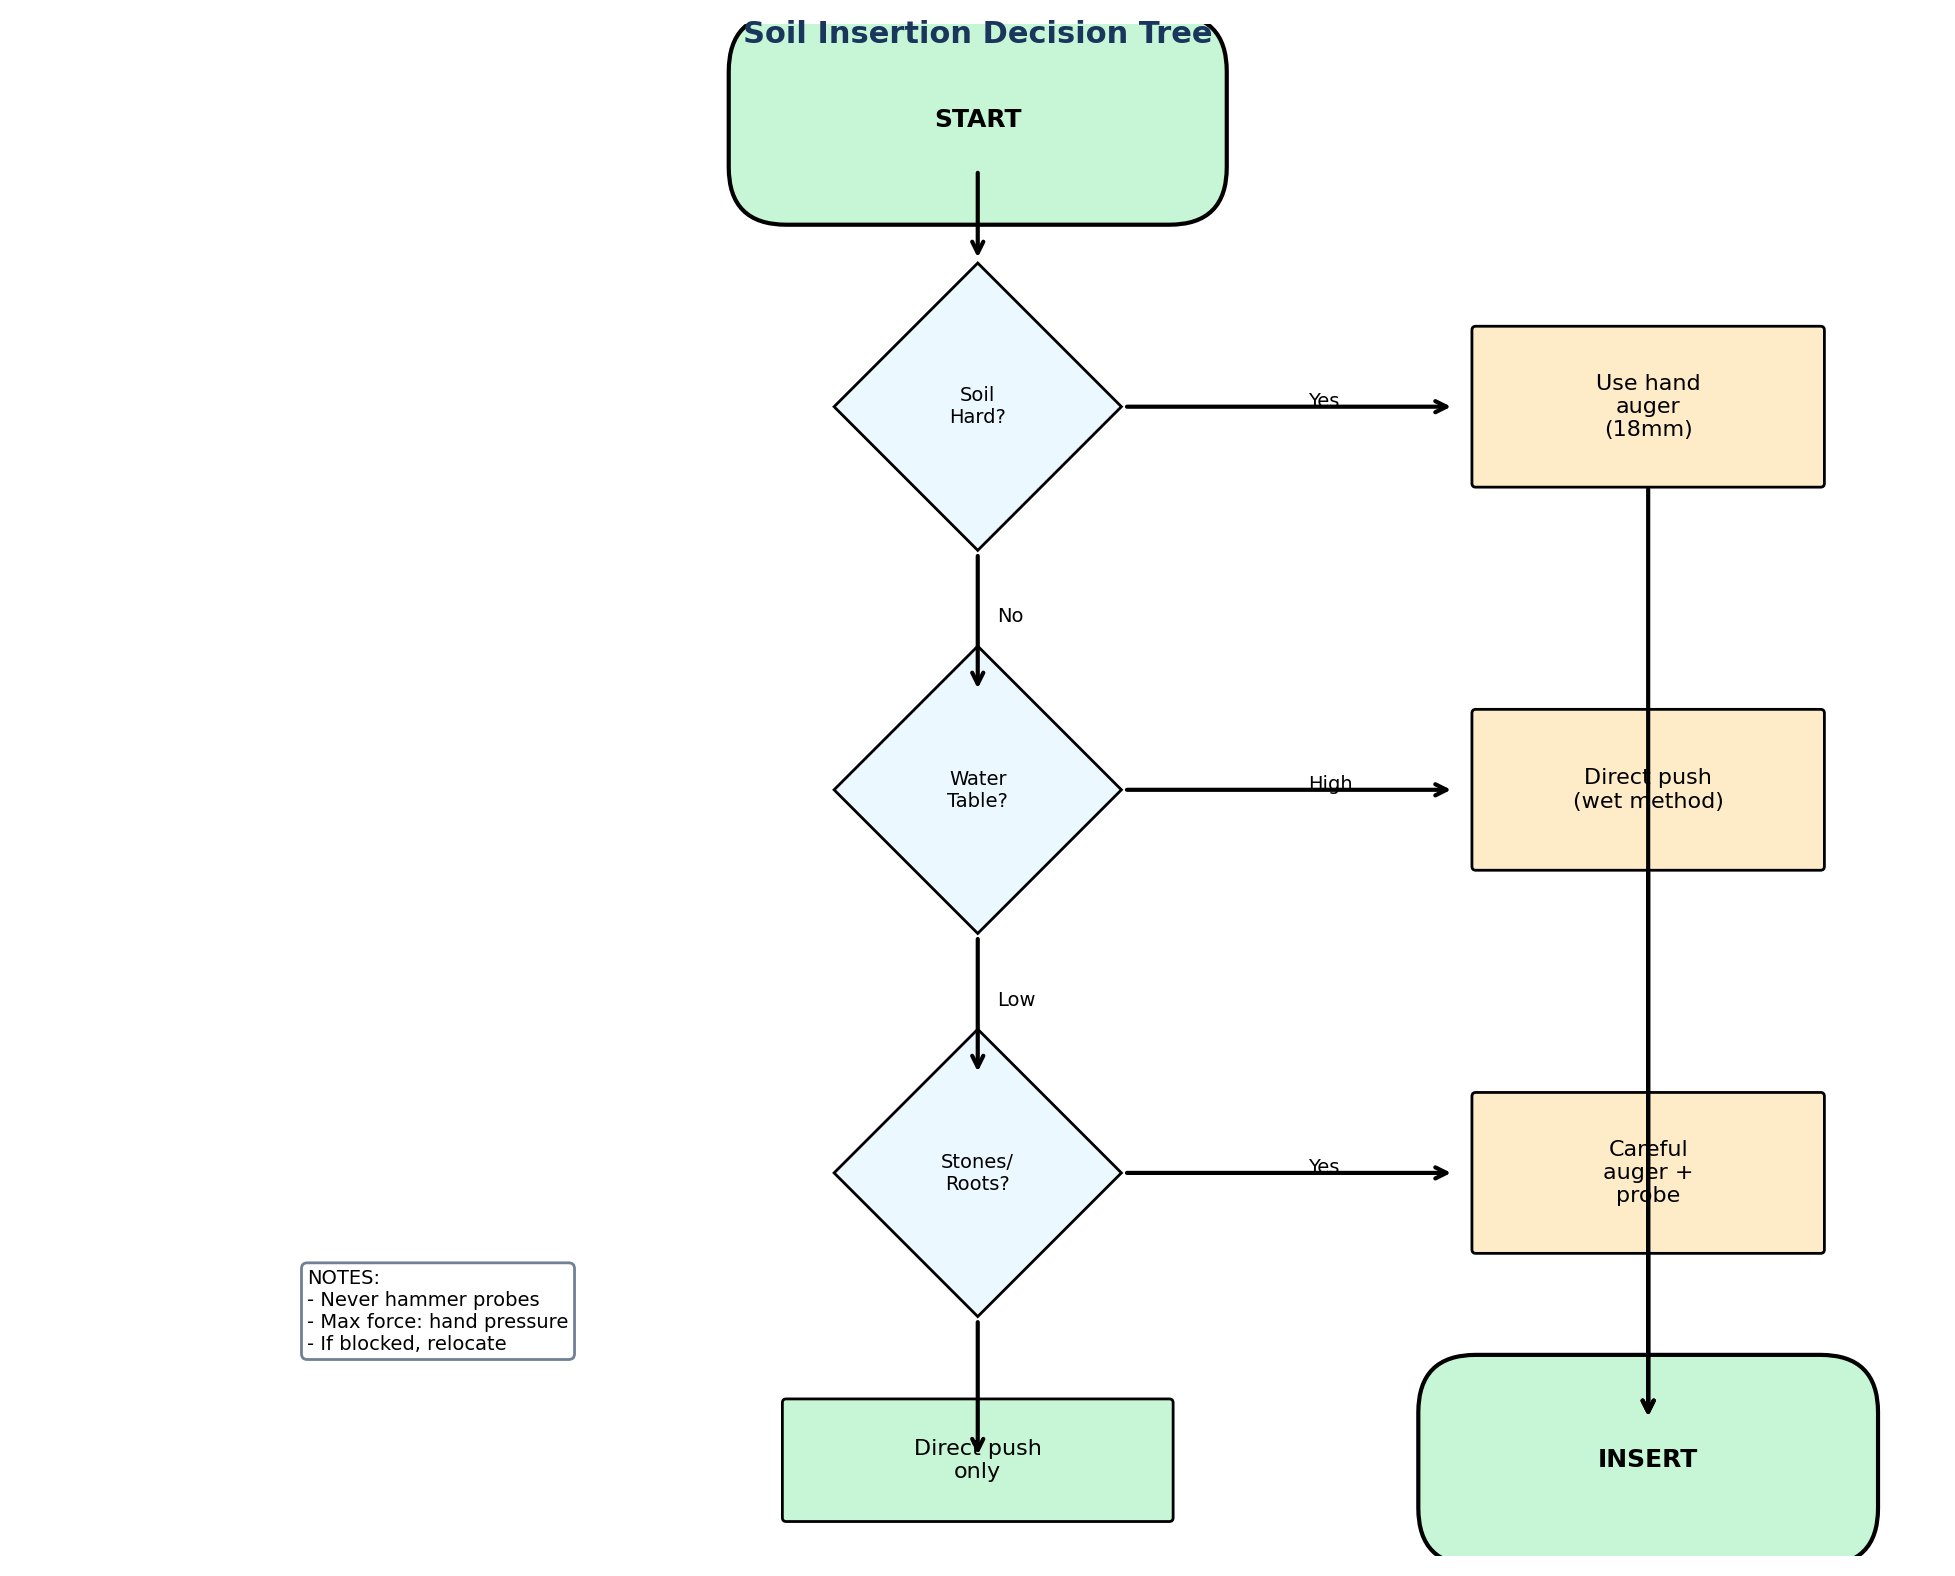

In [4]:
#| label: fig-soil-decision-tree
#| fig-cap: 'Soil type insertion decision tree. The procedure adapts based on soil hardness, water table depth, and presence of obstructions. Key principle: never hammer probes; use maximum hand pressure only.'

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, Polygon

COLORS = {
    'primary': '#1a365d',
    'gray_med': '#718096',
    'light_green': '#c6f6d5',
    'light_blue': '#ebf8ff',
    'light_orange': '#feebc8',
}

def draw_terminal(ax, x, y, width, height, text, color='white'):
    patch = FancyBboxPatch((x - width/2, y - height/2), width, height,
                           boxstyle="round,pad=0.3",
                           facecolor=color, edgecolor='black', linewidth=1.5)
    ax.add_patch(patch)
    ax.text(x, y, text, ha='center', va='center', fontsize=9, fontweight='bold')

def draw_decision_diamond(ax, x, y, size, text, color='white'):
    half = size / 2
    points = [(x, y + half), (x + half, y), (x, y - half), (x - half, y)]
    patch = Polygon(points, facecolor=color, edgecolor='black', linewidth=1)
    ax.add_patch(patch)
    ax.text(x, y, text, ha='center', va='center', fontsize=7)

def draw_process_box(ax, x, y, width, height, text, color='white'):
    patch = FancyBboxPatch((x - width/2, y - height/2), width, height,
                           boxstyle="round,pad=0.02",
                           facecolor=color, edgecolor='black', linewidth=1)
    ax.add_patch(patch)
    ax.text(x, y, text, ha='center', va='center', fontsize=8, wrap=True)

def draw_flow_arrow(ax, start, end, label=None, color='black'):
    ax.annotate('', xy=end, xytext=start,
               arrowprops=dict(arrowstyle='->', color=color, lw=1.5))
    if label:
        mid_x = (start[0] + end[0]) / 2
        mid_y = (start[1] + end[1]) / 2
        ax.text(mid_x + 0.1, mid_y, label, fontsize=7, color=color)

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
ax.axis('off')

# Start
draw_terminal(ax, 5, 7.5, 2, 0.5, 'START', COLORS['light_green'])

# First decision: Soil hardness
draw_decision_diamond(ax, 5, 6, 1.5, 'Soil\nHard?', COLORS['light_blue'])
draw_flow_arrow(ax, (5, 7.25), (5, 6.75))

# Hard soil path
draw_flow_arrow(ax, (5.75, 6), (7.5, 6), 'Yes')
draw_process_box(ax, 8.5, 6, 1.8, 0.8, 'Use hand\nauger\n(18mm)', COLORS['light_orange'])

# Soft soil path
draw_flow_arrow(ax, (5, 5.25), (5, 4.5), 'No')
draw_decision_diamond(ax, 5, 4, 1.5, 'Water\nTable?', COLORS['light_blue'])

# High water table
draw_flow_arrow(ax, (5.75, 4), (7.5, 4), 'High')
draw_process_box(ax, 8.5, 4, 1.8, 0.8, 'Direct push\n(wet method)', COLORS['light_orange'])

# Low water table
draw_flow_arrow(ax, (5, 3.25), (5, 2.5), 'Low')
draw_decision_diamond(ax, 5, 2, 1.5, 'Stones/\nRoots?', COLORS['light_blue'])

# With obstructions
draw_flow_arrow(ax, (5.75, 2), (7.5, 2), 'Yes')
draw_process_box(ax, 8.5, 2, 1.8, 0.8, 'Careful\nauger +\nprobe', COLORS['light_orange'])

# Clear path
draw_flow_arrow(ax, (5, 1.25), (5, 0.5))
draw_process_box(ax, 5, 0.5, 2.0, 0.6, 'Direct push\nonly', COLORS['light_green'])

# Convergence arrows to success
for y in [6, 4, 2]:
    draw_flow_arrow(ax, (8.5, y - 0.4), (8.5, 0.7), '')

# Success terminal
draw_terminal(ax, 8.5, 0.5, 1.8, 0.5, 'INSERT', COLORS['light_green'])

# Title
ax.text(5, 7.9, 'Soil Insertion Decision Tree', ha='center',
       fontsize=11, fontweight='bold', color=COLORS['primary'])

# Notes
ax.text(1.5, 1.5, 'NOTES:\n- Never hammer probes\n- Max force: hand pressure\n- If blocked, relocate',
       fontsize=7, va='top', bbox=dict(boxstyle='round', facecolor='white',
                                      edgecolor=COLORS['gray_med']))

plt.tight_layout()
plt.show()

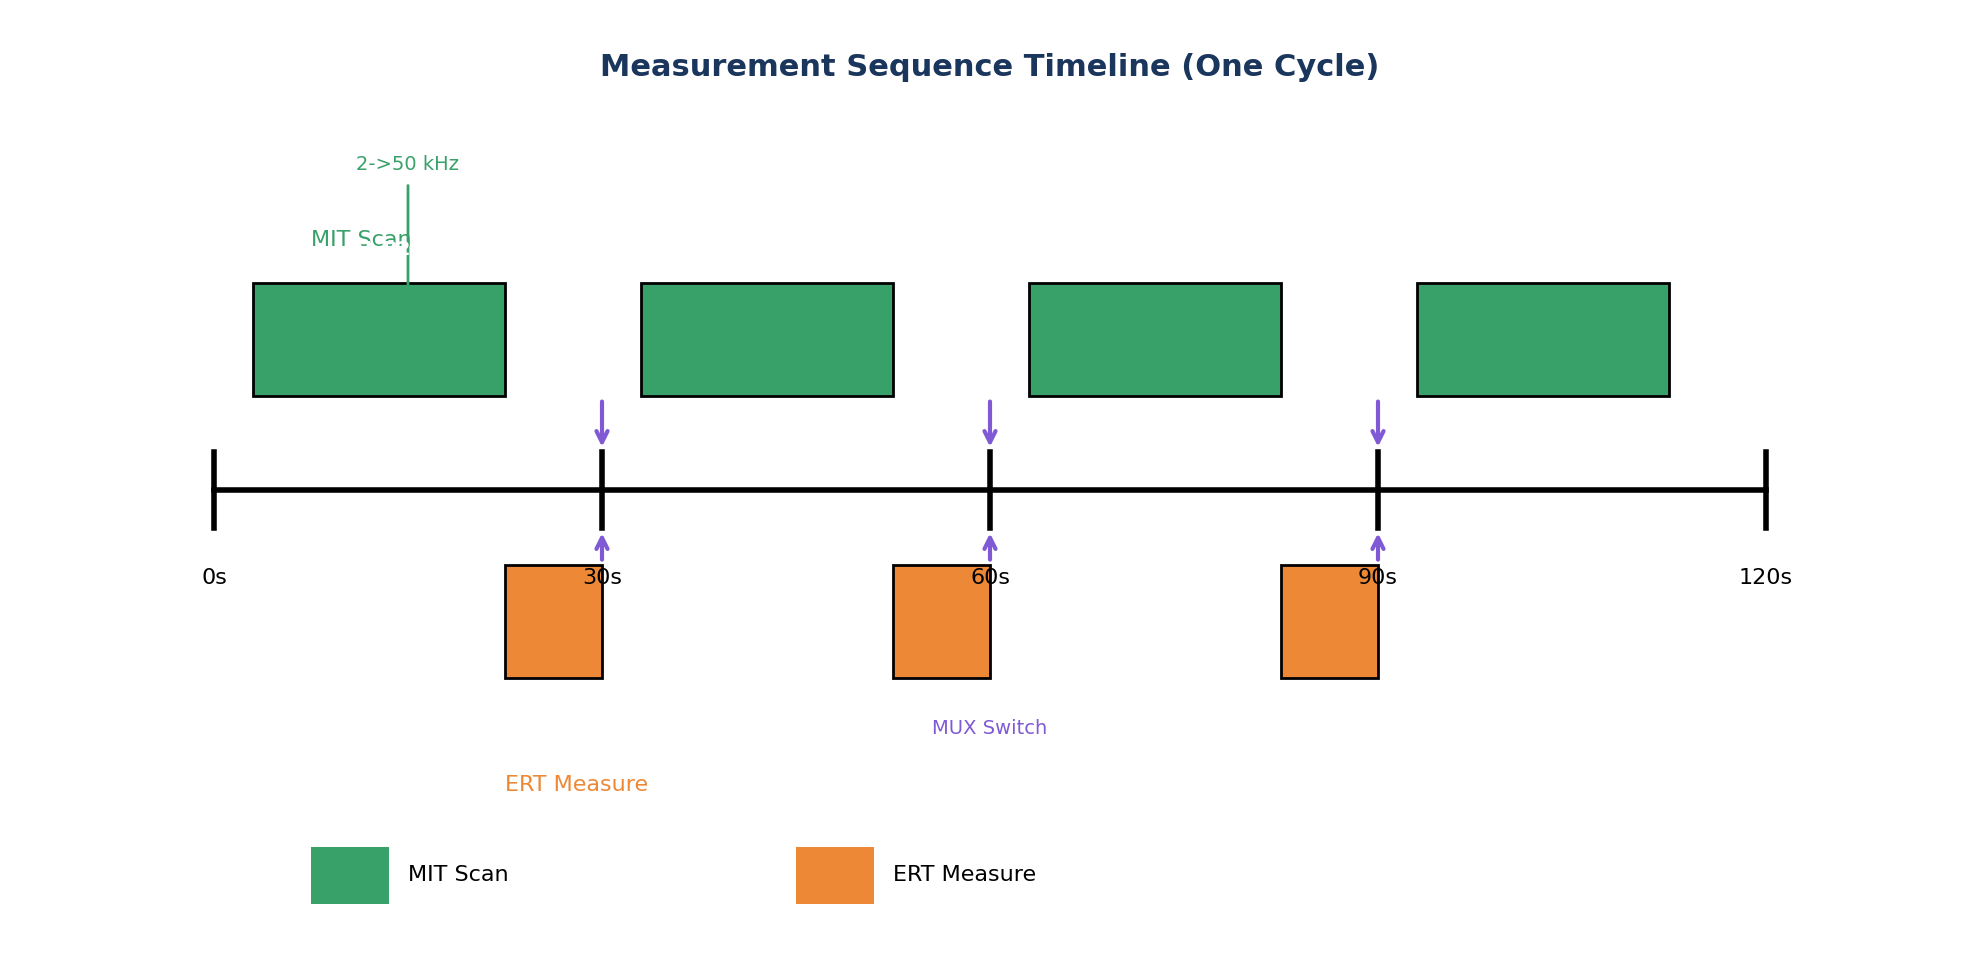

In [5]:
#| label: fig-measurement-sequence
#| fig-cap: Measurement sequence timeline showing interleaved MIT scanning and ERT measurement cycles. MIT scans sweep through frequencies (2-50 kHz) while ERT measurements occur during multiplexer switching intervals.

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

COLORS = {
    'primary': '#1a365d',
    'success': '#38a169',
    'orange': '#ed8936',
    'purple': '#805ad5',
    'accent': '#3182ce',
}

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 10)
ax.set_ylim(0, 5)
ax.axis('off')

# Timeline base
ax.plot([1, 9], [2.5, 2.5], 'k-', lw=2)

# Time markers
times = [1, 3, 5, 7, 9]
labels = ['0s', '30s', '60s', '90s', '120s']
for t, label in zip(times, labels):
    ax.plot([t, t], [2.3, 2.7], 'k-', lw=2)
    ax.text(t, 2.0, label, ha='center', fontsize=8)

# MIT measurement blocks
mit_times = [(1.2, 2.5), (3.2, 4.5), (5.2, 6.5), (7.2, 8.5)]
for start, end in mit_times:
    ax.add_patch(Rectangle((start, 3.0), end-start, 0.6,
                           facecolor=COLORS['success'], edgecolor='black', lw=1))
ax.text(1.5, 3.8, 'MIT Scan', fontsize=8, color=COLORS['success'])

# Frequency sweep indicator
ax.annotate('2->50 kHz', xy=(2.0, 3.3), xytext=(2.0, 4.2),
           fontsize=7, ha='center', color=COLORS['success'],
           arrowprops=dict(arrowstyle='->', color=COLORS['success']))

# ERT measurement blocks
ert_times = [(2.5, 3.0), (4.5, 5.0), (6.5, 7.0)]
for start, end in ert_times:
    ax.add_patch(Rectangle((start, 1.5), end-start, 0.6,
                           facecolor=COLORS['orange'], edgecolor='black', lw=1))
ax.text(2.5, 0.9, 'ERT Measure', fontsize=8, color=COLORS['orange'])

# Multiplexer switching
for t in [3.0, 5.0, 7.0]:
    ax.annotate('', xy=(t, 2.7), xytext=(t, 3.0),
               arrowprops=dict(arrowstyle='->', color=COLORS['purple'], lw=1.5))
    ax.annotate('', xy=(t, 2.3), xytext=(t, 2.1),
               arrowprops=dict(arrowstyle='->', color=COLORS['purple'], lw=1.5))
ax.text(5.0, 1.2, 'MUX Switch', fontsize=7, ha='center', color=COLORS['purple'])

# Probe pairs indicator
probe_labels = ['P1-P2', 'P2-P3', 'P3-P4', 'P4-P5']
for i, (start, end) in enumerate(mit_times):
    if i < len(probe_labels):
        ax.text((start+end)/2, 3.75, probe_labels[i], ha='center',
               fontsize=7, color='white', fontweight='bold')

# Title
ax.text(5, 4.7, 'Measurement Sequence Timeline (One Cycle)',
       ha='center', fontsize=11, fontweight='bold', color=COLORS['primary'])

# Legend
legend_y = 0.3
ax.add_patch(Rectangle((1.5, legend_y), 0.4, 0.3, facecolor=COLORS['success']))
ax.text(2.0, legend_y + 0.15, 'MIT Scan', fontsize=8, va='center')
ax.add_patch(Rectangle((4.0, legend_y), 0.4, 0.3, facecolor=COLORS['orange']))
ax.text(4.5, legend_y + 0.15, 'ERT Measure', fontsize=8, va='center')

plt.tight_layout()
plt.show()

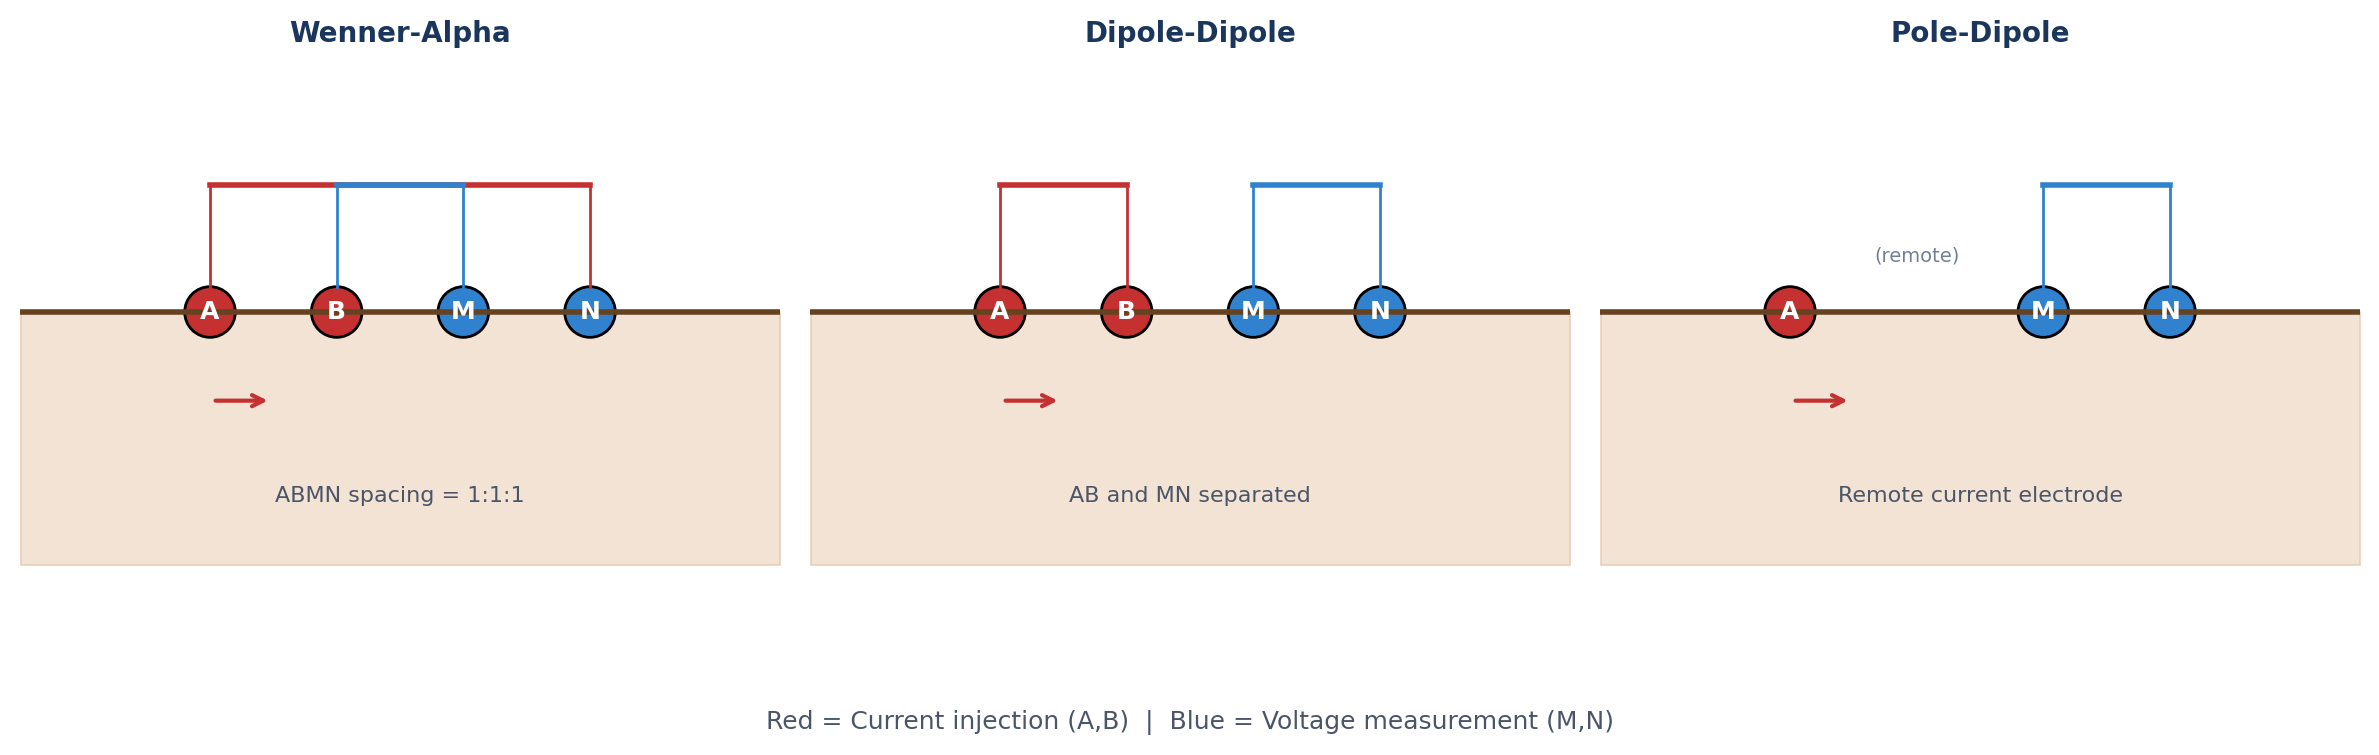

In [6]:
#| label: fig-ert-patterns
#| fig-cap: 'ERT injection pattern options. (a) Wenner-Alpha: symmetric ABMN spacing for uniform sensitivity. (b) Dipole-Dipole: separated current and voltage dipoles for lateral resolution. (c) Pole-Dipole: remote current electrode for deep penetration.'

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

COLORS = {
    'primary': '#1a365d',
    'accent': '#3182ce',
    'warning': '#c53030',
    'gray_dark': '#4a5568',
    'gray_med': '#718096',
    'ground_tan': '#d4a373',
}

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

patterns = [
    ('Wenner-Alpha', [(0, 3), (1, 2)], 'ABMN spacing = 1:1:1'),
    ('Dipole-Dipole', [(0, 1), (2, 3)], 'AB and MN separated'),
    ('Pole-Dipole', [(0, None), (2, 3)], 'Remote current electrode'),
]

for ax, (name, pairs, desc) in zip(axes, patterns):
    ax.set_xlim(-1, 5)
    ax.set_ylim(-1, 3)
    ax.set_aspect('equal')

    # Ground line
    ax.axhline(1, color='#654321', lw=2)
    ax.fill_between([-1, 5], [1, 1], [-1, -1], color=COLORS['ground_tan'], alpha=0.3)

    # Electrode positions
    positions = [0.5, 1.5, 2.5, 3.5]
    labels = ['A', 'B', 'M', 'N']

    for i, (pos, label) in enumerate(zip(positions, labels)):
        is_current = label in ['A', 'B']
        color = COLORS['warning'] if is_current else COLORS['accent']

        # Skip if remote electrode
        if pairs[0][1] is None and label == 'B':
            ax.text(pos, 1.4, '(remote)', fontsize=7, ha='center',
                   color=COLORS['gray_med'])
            continue

        ax.add_patch(Circle((pos, 1), 0.2, facecolor=color,
                           edgecolor='black', lw=1))
        ax.text(pos, 1, label, ha='center', va='center',
               fontsize=9, color='white', fontweight='bold')

    # Connection lines
    for pair, color in [(pairs[0], COLORS['warning']), (pairs[1], COLORS['accent'])]:
        if pair[0] is not None and pair[1] is not None:
            x1, x2 = positions[pair[0]], positions[pair[1]]
            ax.plot([x1, x2], [2.0, 2.0], color=color, lw=2)
            ax.plot([x1, x1], [1.2, 2.0], color=color, lw=1)
            ax.plot([x2, x2], [1.2, 2.0], color=color, lw=1)

    # Current flow indication
    ax.annotate('', xy=(positions[pairs[0][0]] + 0.5, 0.3),
               xytext=(positions[pairs[0][0]], 0.3),
               arrowprops=dict(arrowstyle='->', color=COLORS['warning'], lw=1.5))

    ax.set_title(name, fontsize=10, fontweight='bold', color=COLORS['primary'])
    ax.text(2, -0.5, desc, ha='center', fontsize=8, color=COLORS['gray_dark'])
    ax.axis('off')

# Legend
fig.text(0.5, 0.02, 'Red = Current injection (A,B)  |  Blue = Voltage measurement (M,N)',
        ha='center', fontsize=9, color=COLORS['gray_dark'])

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

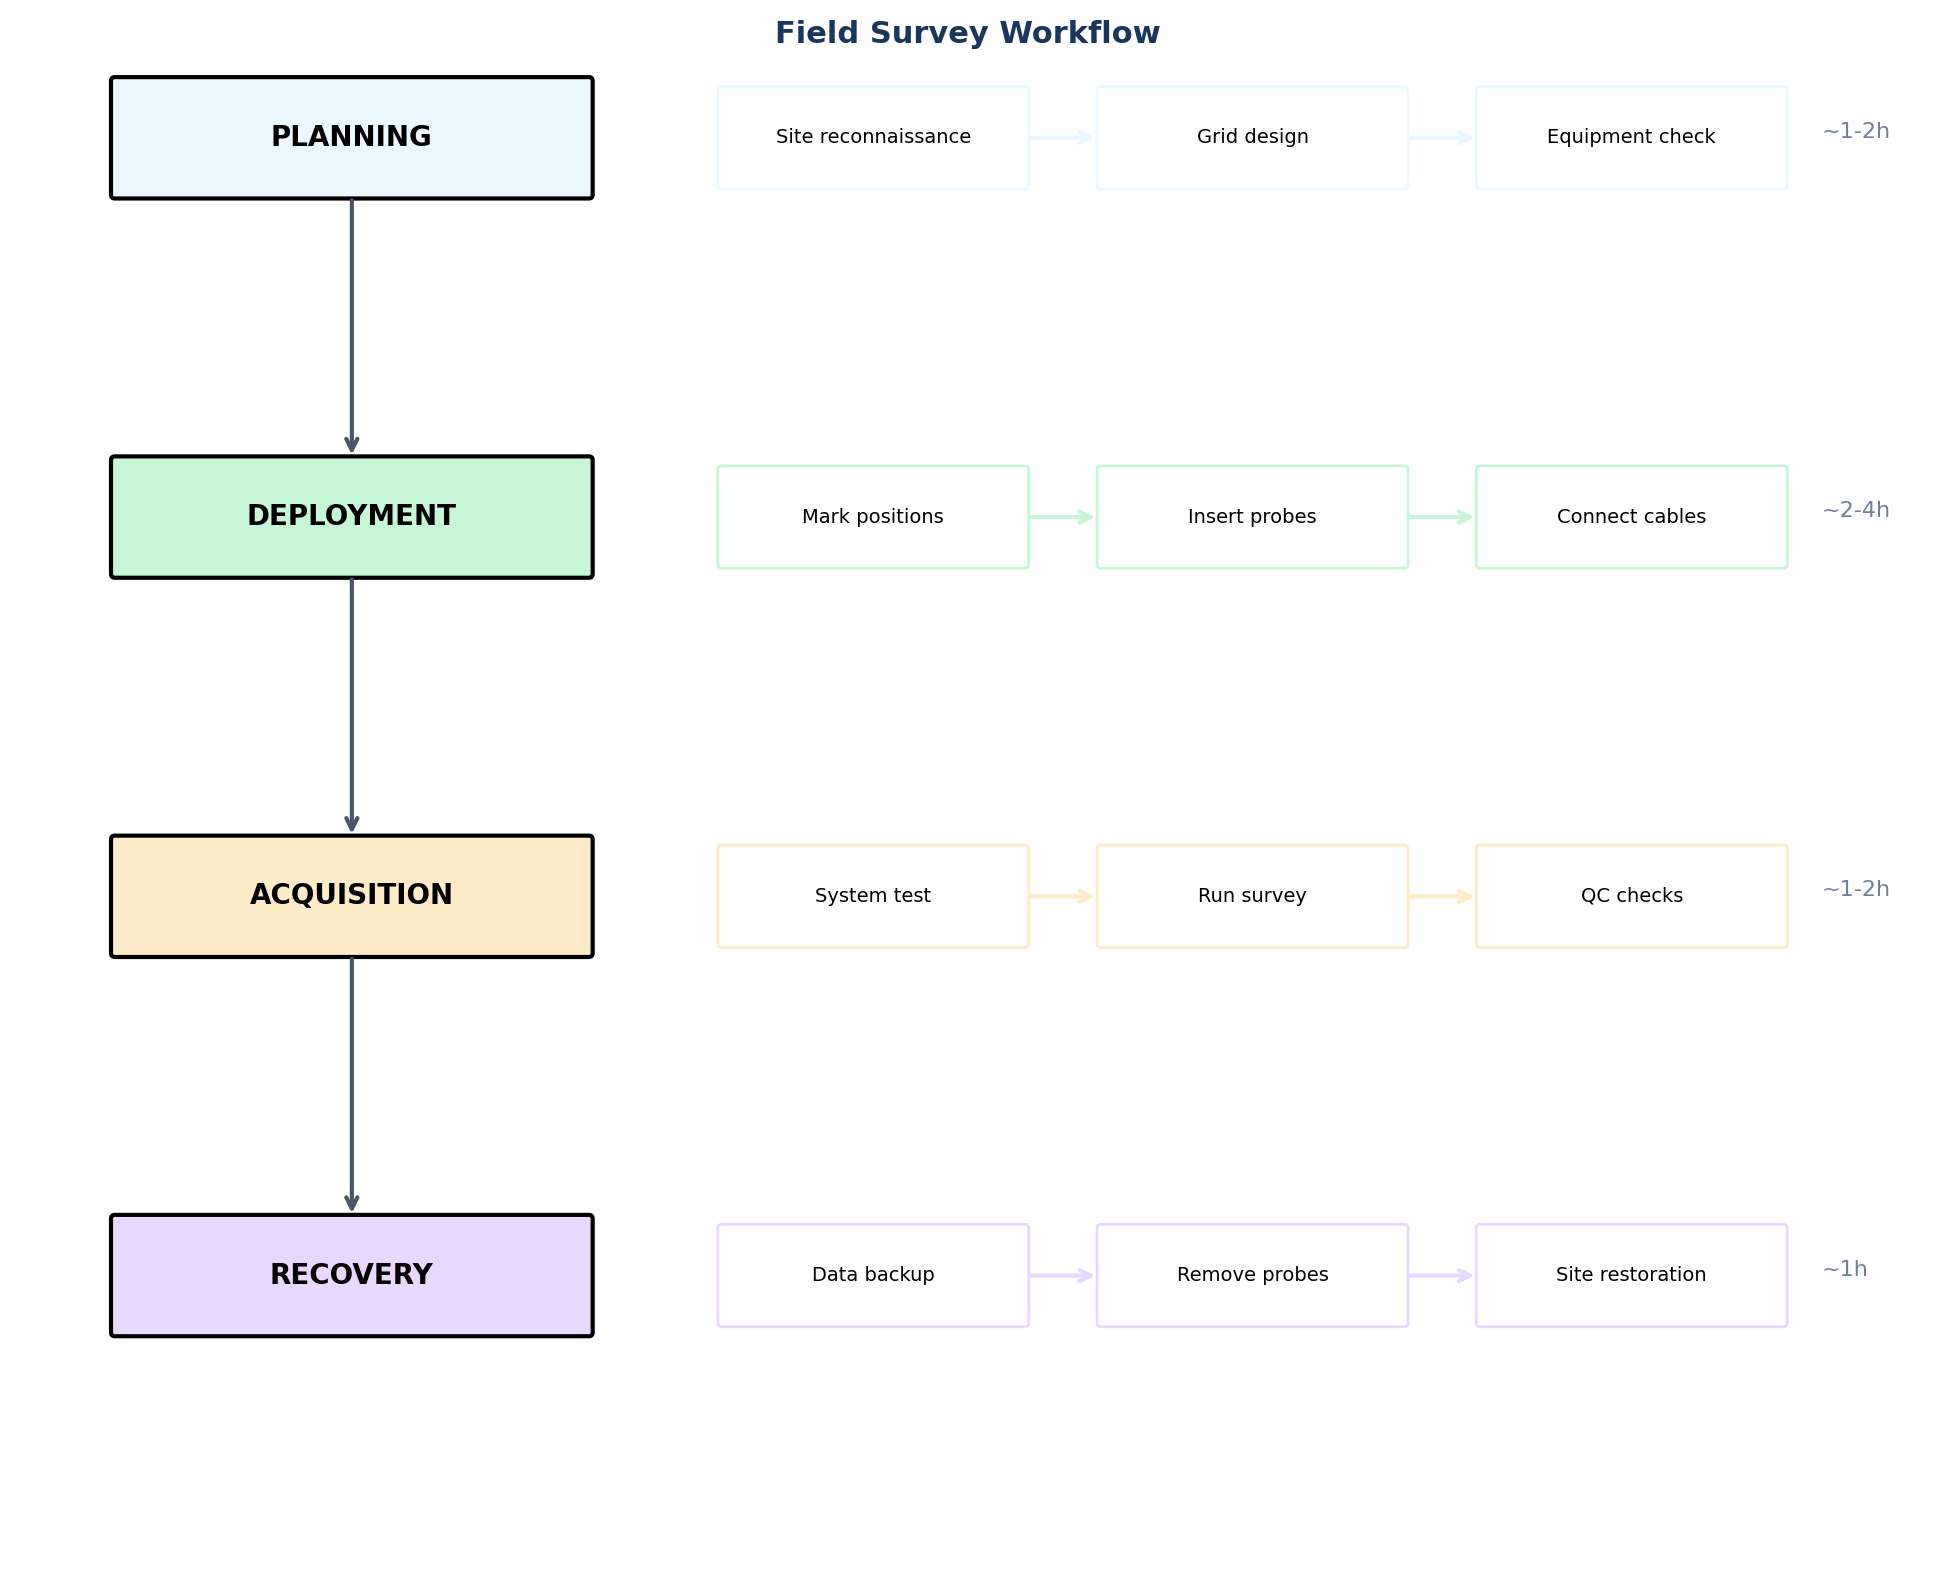

In [7]:
#| label: fig-survey-workflow
#| fig-cap: 'Complete field survey workflow showing four phases: Planning (site reconnaissance, grid design, equipment check), Deployment (marking, insertion, cabling), Acquisition (system test, survey execution, QC checks), and Recovery (backup, extraction, restoration).'

import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

COLORS = {
    'primary': '#1a365d',
    'gray_dark': '#4a5568',
    'gray_med': '#718096',
    'light_green': '#c6f6d5',
    'light_blue': '#ebf8ff',
    'light_orange': '#feebc8',
    'light_purple': '#e9d8fd',
}

def draw_flow_arrow(ax, start, end, color='black'):
    ax.annotate('', xy=end, xytext=start,
               arrowprops=dict(arrowstyle='->', color=color, lw=1.5))

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)
ax.set_aspect('equal')
ax.axis('off')

# Phases with vertical layout
phases = [
    ('PLANNING', 7.5, [
        'Site reconnaissance',
        'Grid design',
        'Equipment check'
    ], COLORS['light_blue']),
    ('DEPLOYMENT', 5.5, [
        'Mark positions',
        'Insert probes',
        'Connect cables'
    ], COLORS['light_green']),
    ('ACQUISITION', 3.5, [
        'System test',
        'Run survey',
        'QC checks'
    ], COLORS['light_orange']),
    ('RECOVERY', 1.5, [
        'Data backup',
        'Remove probes',
        'Site restoration'
    ], COLORS['light_purple']),
]

for phase_name, y, steps, color in phases:
    # Phase header
    ax.add_patch(FancyBboxPatch((0.5, y - 0.3), 2.5, 0.6,
                                boxstyle="round,pad=0.02",
                                facecolor=color, edgecolor='black', lw=1.5))
    ax.text(1.75, y, phase_name, ha='center', va='center',
           fontsize=10, fontweight='bold')

    # Steps
    for i, step in enumerate(steps):
        x = 4.5 + i * 2
        ax.add_patch(FancyBboxPatch((x - 0.8, y - 0.25), 1.6, 0.5,
                                    boxstyle="round,pad=0.02",
                                    facecolor='white', edgecolor=color, lw=1))
        ax.text(x, y, step, ha='center', va='center', fontsize=7)

        # Arrow to next step
        if i < len(steps) - 1:
            draw_flow_arrow(ax, (x + 0.8, y), (x + 1.2, y), color=color)

# Phase transitions
for i in range(len(phases) - 1):
    draw_flow_arrow(ax, (1.75, phases[i][1] - 0.3),
                   (1.75, phases[i+1][1] + 0.3), color=COLORS['gray_dark'])

# Time estimates
ax.text(9.5, 7.5, '~1-2h', fontsize=8, color=COLORS['gray_med'])
ax.text(9.5, 5.5, '~2-4h', fontsize=8, color=COLORS['gray_med'])
ax.text(9.5, 3.5, '~1-2h', fontsize=8, color=COLORS['gray_med'])
ax.text(9.5, 1.5, '~1h', fontsize=8, color=COLORS['gray_med'])

# Title
ax.text(5, 8, 'Field Survey Workflow', ha='center',
       fontsize=11, fontweight='bold', color=COLORS['primary'])

plt.tight_layout()
plt.show()

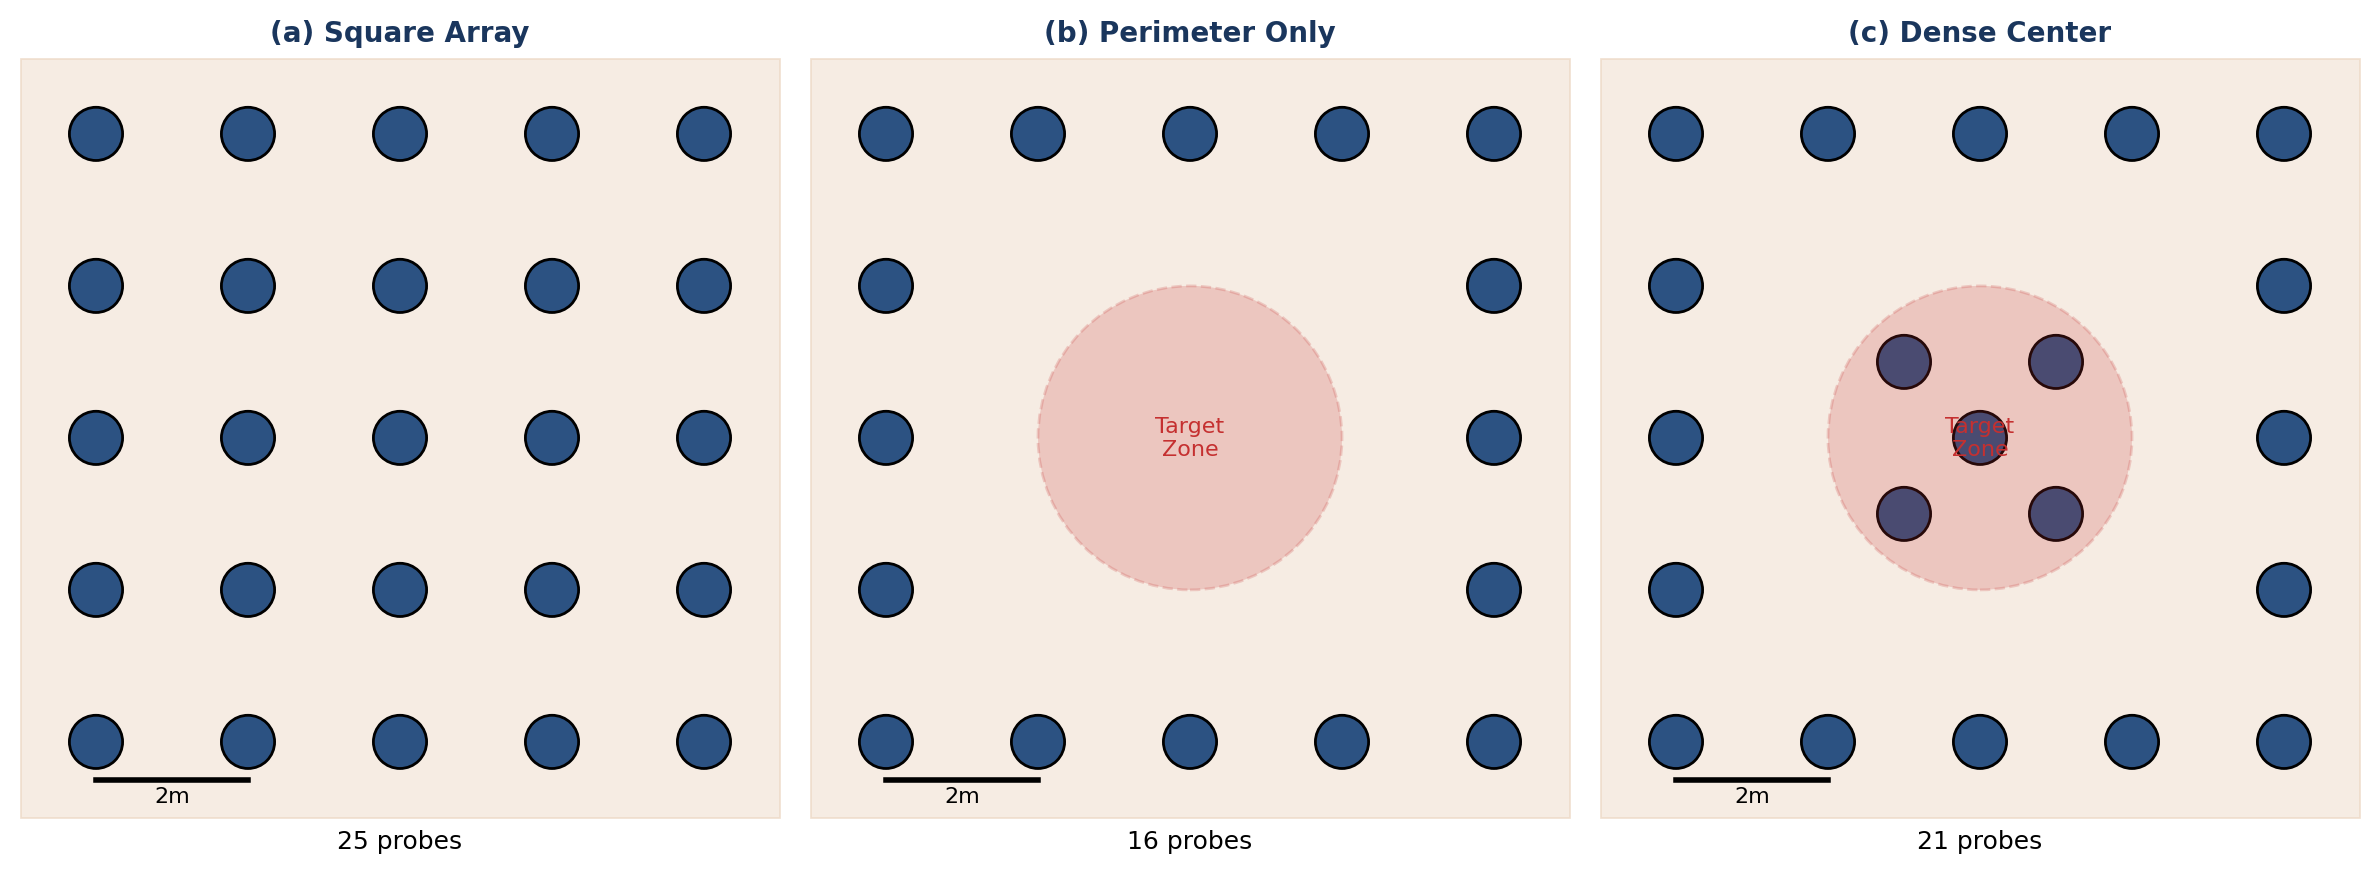

In [8]:
#| label: fig-deployment-scenarios
#| fig-cap: 'Deployment scenario configurations. (a) Square Array: uniform coverage for general surveys (25 probes). (b) Perimeter Only: ring deployment around known target zone for minimal disturbance (16 probes). (c) Dense Center: enhanced resolution over target with perimeter context (21 probes).'

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse

COLORS = {
    'primary': '#1a365d',
    'secondary': '#2c5282',
    'warning': '#c53030',
    'ground_tan': '#d4a373',
}

fig, axes = plt.subplots(1, 3, figsize=(12, 4.5))

scenarios = [
    ('(a) Square Array', 'square'),
    ('(b) Perimeter Only', 'perimeter'),
    ('(c) Dense Center', 'dense_center'),
]

for ax, (title, pattern) in zip(axes, scenarios):
    ax.set_xlim(-1, 9)
    ax.set_ylim(-1, 9)
    ax.set_aspect('equal')

    # Grid background
    ax.fill_between([-1, 9], [-1, -1], [9, 9], color=COLORS['ground_tan'], alpha=0.2)

    # Probe positions based on pattern
    if pattern == 'square':
        positions = [(i*2, j*2) for i in range(5) for j in range(5)]
    elif pattern == 'perimeter':
        positions = (
            [(0, j*2) for j in range(5)] +  # Left
            [(8, j*2) for j in range(5)] +  # Right
            [(i*2, 0) for i in range(1, 4)] +  # Bottom
            [(i*2, 8) for i in range(1, 4)]    # Top
        )
    else:  # dense_center
        # Outer ring
        positions = [(0, j*2) for j in range(5)] + [(8, j*2) for j in range(5)]
        positions += [(i*2, 0) for i in range(1, 4)] + [(i*2, 8) for i in range(1, 4)]
        # Inner dense
        positions += [(3, 3), (5, 3), (3, 5), (5, 5), (4, 4)]

    # Draw probes
    for i, (x, y) in enumerate(positions):
        ax.add_patch(Circle((x, y), 0.35, facecolor=COLORS['secondary'],
                           edgecolor='black', lw=1))

    # Target zone for perimeter and dense
    if pattern in ['perimeter', 'dense_center']:
        ax.add_patch(Ellipse((4, 4), 4, 4, facecolor=COLORS['warning'],
                            alpha=0.2, edgecolor=COLORS['warning'], linestyle='--'))
        ax.text(4, 4, 'Target\nZone', ha='center', va='center',
               fontsize=8, color=COLORS['warning'])

    # Scale bar
    ax.plot([0, 2], [-0.5, -0.5], 'k-', lw=2)
    ax.text(1, -0.8, '2m', ha='center', fontsize=8)

    ax.set_title(title, fontsize=10, fontweight='bold', color=COLORS['primary'])
    ax.set_xlabel(f'{len(positions)} probes', fontsize=9)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()